In [2]:
# Now do https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html

import numpy as np
import cv2
import os

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import torch
import torchvision
# from torchvision.utils import draw_bounding_boxes

print(torch.__version__)
print(torchvision.__version__)

1.7.0
0.8.1


work (ish):
1.7.0
0.8.1

no work: 
1.9.0
0.9.0a0

# Using vanilla model
(faster R-CNN + resnet50 fpn)

In [3]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True, progress=True, pretrained_backbone=True)

In [4]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/home/simon/Documents/Bodies/data/jeppe/images/JS52195.jpg


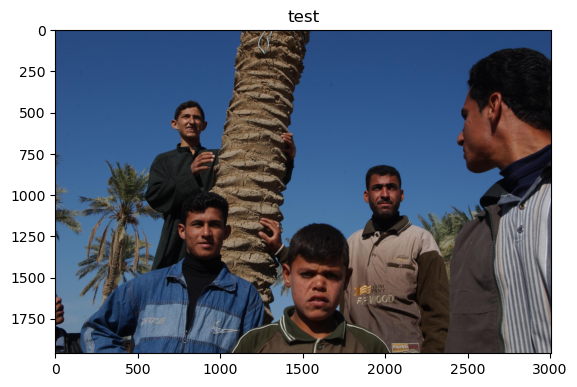

In [5]:
path = '/home/simon/Documents/Bodies/data/jeppe/images'

imgs = []
for filename in os.listdir(path):
    if filename.split('.')[1] == 'jpg':
        imgs.append(filename)

imgs

path_img = os.path.join(path, imgs[1])

print(path_img)

img = cv2.imread(path_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # correcting the colors:
plt.imshow(img)
plt.title('test')
plt.show()


"The input to the model is expected to be a list of tensors, each of shape [C, H, W], one for each
image, and should be in 0-1 range. Different images can have different sizes."

In [6]:
print(img.shape)
img = np.moveaxis(img, -1, 0) # move channels in front so c,h,w
img = np.expand_dims(img, axis=0) # inserting batch dim in front so b,c,h,w

print(img.shape)
img_tensor = torch.Tensor(img)
img_tensor = img_tensor / 255.0 # norm ot range 0-1
img_tensor = img_tensor.to(DEVICE)


(1960, 3008, 3)
(1, 3, 1960, 3008)


In [7]:
model.eval()
predictions = model(img_tensor)
predictions # boxes in xmin, ymin, xmax, ymax format

[{'boxes': tensor([[1.7477e+03, 8.2422e+02, 2.4029e+03, 1.9483e+03],
          [1.5146e+02, 9.6676e+02, 1.3211e+03, 1.9364e+03],
          [2.2968e+03, 7.1673e+01, 3.0080e+03, 1.9600e+03],
          [1.0676e+03, 1.1449e+03, 1.9440e+03, 1.9375e+03],
          [5.3413e+02, 4.2307e+02, 1.0057e+03, 1.4728e+03],
          [9.5129e+00, 1.5906e+03, 1.6401e+02, 1.9600e+03],
          [2.1950e+02, 1.5185e+02, 1.4295e+03, 1.8477e+03],
          [1.7017e+00, 1.5997e+03, 6.9635e+01, 1.9519e+03],
          [8.2741e+02, 2.9768e+00, 1.5747e+03, 1.5644e+03],
          [2.8592e+02, 4.6995e+02, 1.0312e+03, 1.7167e+03],
          [1.2331e+03, 1.1819e+03, 1.3264e+03, 1.2604e+03],
          [1.7705e+03, 1.7571e+03, 2.0221e+03, 1.9564e+03],
          [9.9211e+02, 7.0586e+01, 1.8422e+03, 1.8723e+03],
          [2.4530e+03, 7.7561e+02, 2.9950e+03, 1.8668e+03],
          [1.2766e+03, 8.3130e+02, 2.2721e+03, 1.9600e+03],
          [1.7659e+03, 1.7710e+03, 2.0212e+03, 1.9527e+03],
          [0.0000e+00, 1.6068e+

In [8]:
inst_classes = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

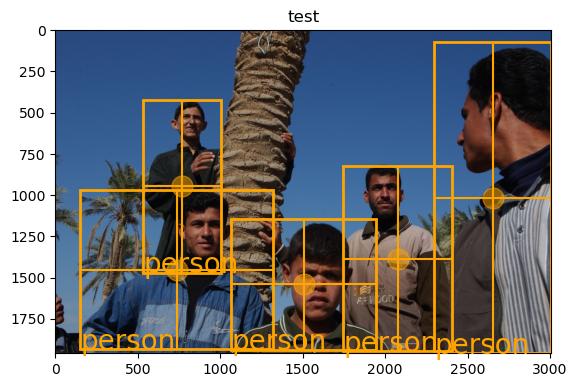

In [9]:
# make you own boundry box funtion and put in util

# box
threshold = .8
color = 'orange'
n_obj = predictions[0]['boxes'].shape[0]

for i in range(n_obj):

    if predictions[0]['scores'][i] > threshold:

        box = predictions[0]['boxes'][i].detach().numpy() # boxes in xmin, ymin, xmax, ymax format

        xmin = box[0]
        ymin = box[1]
        xmax = box[2]
        ymax = box[3]

        xdiff = xmax - xmin
        ydiff = ymax - ymin

        xcenter = xmin + xdiff/2
        ycenter = ymin + ydiff/2


        plt.plot(xcenter, ycenter,'o', ms = 15, alpha = 0.5, color = color)

        plt.hlines(ycenter, xmin, xmax, color = color)
        plt.vlines(xcenter, ymin, ymax, color = color)

        plt.annotate(inst_classes[predictions[0]['labels'][i]], [xmin, ymax], fontsize = 20, color = color)
                    
        rect = Rectangle((xmin, ymin),xdiff,ydiff,linewidth = 2, edgecolor = color, facecolor='none')
            
        ax = plt.gca()
        ax.add_patch(rect)

# img:

img = cv2.imread(path_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # correcting the colors:
plt.imshow(img)
plt.title('test')

plt.show()


# Dataloader before finetuning

In [10]:
from PIL import Image
from xml.etree import ElementTree, ElementInclude


Important! Right now the dataloader does not differentiate between annotated images and not annotated images. Either it need to load only images with a corrospoding xml file or you need to have another step where you isolate the annotated images. The last selution seems most neat... 

In [71]:
[f"{i.split('.')[0]}.jpg" for i in dataset.boxes]

['JS10088.jpg',
 'JS10096.jpg',
 'JS10098.jpg',
 'JS10119.jpg',
 'JS1037.jpg',
 'JS1039.jpg',
 'JS10450.jpg',
 'JS10548.jpg',
 'JS10571.jpg',
 'JS1067.jpg',
 'JS10677.jpg',
 'JS10728.jpg',
 'JS10743.jpg',
 'JS10760.jpg',
 'JS10771.jpg',
 'JS10900.jpg',
 'JS10938.jpg',
 'JS10973.jpg',
 'JS10999.jpg',
 'JS11070.jpg',
 'JS11072.jpg',
 'JS11073.jpg',
 'JS11087.jpg',
 'JS11109.jpg',
 'JS11123.jpg',
 'JS11142.jpg',
 'JS11163.jpg',
 'JS11276.jpg',
 'JS1131.jpg',
 'JS11316.jpg',
 'JS11373.jpg',
 'JS1140.jpg',
 'JS11412.jpg',
 'JS1145.jpg',
 'JS11493.jpg',
 'JS11497.jpg',
 'JS11513.jpg',
 'JS1154.jpg',
 'JS11545.jpg',
 'JS11563.jpg',
 'JS11575.jpg',
 'JS11635.jpg',
 'JS11637.jpg',
 'JS11751.jpg',
 'JS11797.jpg',
 'JS11897.jpg',
 'JS11902.jpg',
 'JS11919.jpg',
 'JS11939.jpg',
 'JS11976.jpg',
 'JS12005.jpg',
 'JS12052.jpg',
 'JS12057.jpg',
 'JS12075.jpg',
 'JS12076.jpg',
 'JS12163.jpg',
 'JS12320.jpg',
 'JS12373.jpg',
 'JS12375.jpg',
 'JS12387.jpg',
 'JS12416.jpg',
 'JS12511.jpg',
 'JS1255.jpg',


In [72]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, root = '/home/simon/Documents/Bodies/data/jeppe/', transforms = None):
        self.root = root
        self.transforms = transforms
        self.boxes = [i for i in list(sorted(os.listdir(os.path.join(root, "images")))) if str(i).split('.')[1] == 'xml'] # list of xml files (box info)
        self.imgs = [f"{i.split('.')[0]}.jpg" for i in self.boxes] # list of images - only take images with box info!
        #self.imgs = [i for i in list(sorted(os.listdir(os.path.join(root, "images")))) if str(i).split('.')[1] == 'jpg'] # list of images
        self.classes = open(os.path.join(root, "images/classes.txt"),"r").read().split('\n')[0:-1] # the classes from the classes.txt file
        self.classes_int = np.arange(1,len(self.classes)+1) # from 1 since no background '0'

    def __getitem__(self, idx):
        # dict to convert classes into classes_int
        class_to_int = dict(zip(self.classes,self.classes_int))        

        # load images
        img_path = os.path.join(self.root, "images", self.imgs[idx])
        box_path = os.path.join(self.root, "images", self.boxes[idx])
        
        #img = Image.open(img_path).convert("RGB") # maybe you also need the dim and norm stuff here.
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = np.moveaxis(img, -1, 0) # move channels in front so h,w,c -> c,h,w
        img = img / 255.0 # norm ot range 0-1. Might move out..
        img = torch.Tensor(img)

        # Open xml path 
        tree = ElementTree.parse(box_path)

        lst_obj = tree.findall('object')
        lst_size = tree.findall('size') # are you using this?
        num_objs = len(lst_obj) # number of objects

        obj_name = []
        obj_ids = []
        boxes = []

        for i in lst_obj:

            obj_name.append(i.find('name').text) # get the actual class name
            obj_ids.append(class_to_int[i.find('name').text]) # get the int associated with the class name
            lst_box = i.findall('bndbox')

            for j in lst_box:

                xmin = float(j.find('xmin').text)
                xmax = float(j.find('xmax').text)
                ymin = float(j.find('ymin').text)
                ymax = float(j.find('ymax').text)
                boxes.append([xmin, ymin, xmax, ymax])

        # convert everything into a torch.Tensor
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(obj_ids, dtype=torch.int64)

        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.imgs) # right now you do not differentiate between annotated images and not annotated images... 


In [73]:
# prediction with costum dataloader

dataset = MyDataset()
data_loader = torch.utils.data.DataLoader(dataset, batch_size=2)

images,targets = next(iter(data_loader))[0:3]

model.eval()
predictions = model(images)

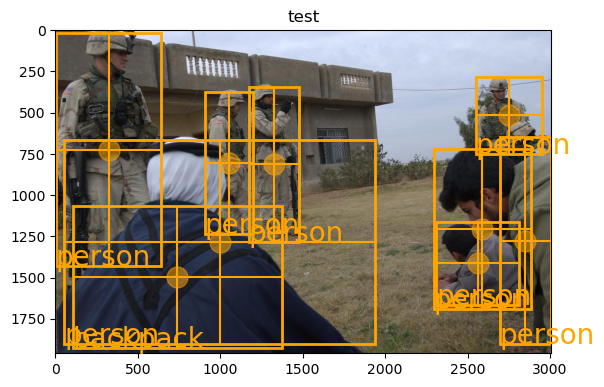

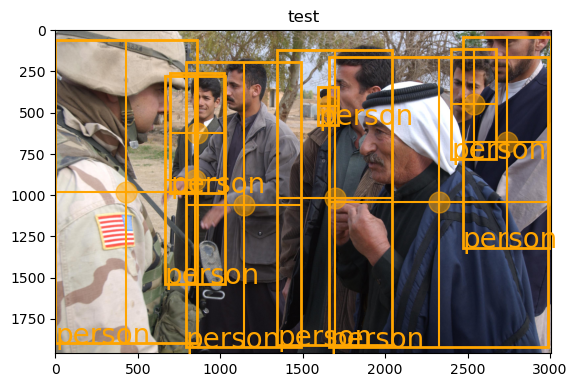

In [74]:
for i,j in enumerate(images): # iterate over images i
    img = j.detach().numpy() # detach from device and tensor to numpy
    img = np.moveaxis(img, 0, -1) # move channels back so c,h,w -> h,w,c
    # note image is still range (0,1)

    threshold = .8 # needs to be and input to the function
    color = 'orange' # needs to vary according to class

    n_obj = predictions[i]['boxes'].shape[0]

    #plot prediction boundry boxes
    for k in range(n_obj): # iterate over objects j in image i
        
        if predictions[i]['scores'][k] > threshold: # is the predictions clear the threshold

            box = predictions[i]['boxes'][k].detach().numpy() # boxes in xmin, ymin, xmax, ymax format

            xmin = box[0]
            ymin = box[1]
            xmax = box[2]
            ymax = box[3]

            xdiff = xmax - xmin
            ydiff = ymax - ymin

            xcenter = xmin + xdiff/2
            ycenter = ymin + ydiff/2


            plt.plot(xcenter, ycenter,'o', ms = 15, alpha = 0.5, color = color)

            plt.hlines(ycenter, xmin, xmax, color = color)
            plt.vlines(xcenter, ymin, ymax, color = color)

            plt.annotate(inst_classes[predictions[i]['labels'][k]], [xmin, ymax], fontsize = 20, color = color)
                        
            rect = Rectangle((xmin, ymin),xdiff,ydiff,linewidth = 2, edgecolor = color, facecolor='none')
                
            ax = plt.gca()
            ax.add_patch(rect)

    #plot target boundry boxes


    # plot image 
    plt.imshow(img)
    plt.title('test')

    plt.show()

In [78]:
dataset.__len__()

816

In [76]:
dataset.imgs[0]

'JS10088.jpg'

In [58]:
targets['boxes'][0]

tensor([[3.1000e+01, 3.3900e+02, 1.4400e+02, 4.3100e+02],
        [9.5600e+02, 5.4100e+02, 1.0350e+03, 5.9200e+02],
        [3.5000e+01, 1.0000e+00, 6.7800e+02, 6.8200e+02],
        [2.9000e+01, 1.0000e+00, 6.7800e+02, 6.8600e+02],
        [3.1000e+01, 1.0000e+00, 6.8000e+02, 6.8200e+02],
        [2.5000e+01, 1.0000e+00, 6.8800e+02, 6.8200e+02],
        [1.9000e+01, 6.9800e+02, 2.6200e+02, 1.5740e+03],
        [9.0100e+02, 3.5900e+02, 1.1820e+03, 9.4100e+02],
        [8.9700e+02, 3.5300e+02, 1.1820e+03, 9.4700e+02],
        [9.0300e+02, 3.5300e+02, 1.1880e+03, 9.4500e+02],
        [9.1700e+02, 3.5700e+02, 1.1930e+03, 9.6400e+02],
        [1.1500e+03, 3.1200e+02, 1.5030e+03, 9.4300e+02],
        [1.1580e+03, 3.1200e+02, 1.4950e+03, 9.4500e+02],
        [1.1520e+03, 3.1200e+02, 1.5010e+03, 9.4500e+02],
        [1.1520e+03, 3.0400e+02, 1.5090e+03, 9.4100e+02],
        [1.3780e+03, 6.7400e+02, 1.5520e+03, 1.2530e+03],
        [2.5270e+03, 2.3100e+02, 2.9250e+03, 7.2900e+02],
        [2.529

In [59]:
targets['labels'][0]

tensor([15, 15,  1,  5,  8, 12, 13,  1,  5,  8, 12,  1,  5,  8, 12, 13,  1,  5,
         8, 12,  1,  5,  8])

In [14]:
# Now it need to take more images as a loop. So make the reak function...  
# an then check the plot against the tagets...
# box
threshold = .8
color = 'orange'
n_obj = predictions[0]['boxes'].shape[0]

for i in range(n_obj):

    if predictions[0]['scores'][i] > threshold:

        box = predictions[0]['boxes'][i].detach().numpy() # boxes in xmin, ymin, xmax, ymax format

        xmin = box[0]
        ymin = box[1]
        xmax = box[2]
        ymax = box[3]

        xdiff = xmax - xmin
        ydiff = ymax - ymin

        xcenter = xmin + xdiff/2
        ycenter = ymin + ydiff/2


        plt.plot(xcenter, ycenter,'o', ms = 15, alpha = 0.5, color = color)

        plt.hlines(ycenter, xmin, xmax, color = color)
        plt.vlines(xcenter, ymin, ymax, color = color)

        plt.annotate(inst_classes[predictions[0]['labels'][i]], [xmin, ymax], fontsize = 20, color = color)
                    
        rect = Rectangle((xmin, ymin),xdiff,ydiff,linewidth = 2, edgecolor = color, facecolor='none')
            
        ax = plt.gca()
        ax.add_patch(rect)

# img:

img = cv2.imread(path_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # correcting the colors:
plt.imshow(img)
plt.title('test')

plt.show()


TypeError: list indices must be integers or slices, not str